# 라이브러리 및 데이터 불러오기

In [47]:
import FinanceDataReader as fdr
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import platform

kospi = fdr.DataReader(symbol="KS11", start="2000")
kospi.to_excel("../Finance_data/kospi.xlsx")

In [48]:
kospi = pd.read_excel("../Finance_data/kospi.xlsx", index_col=0)
kospi.head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2000-01-04,1028.33,1066.18,1016.59,1059.04,195898660,0.0301,1,30.97,3771013000000,NaN
2000-01-05,1006.87,1047.70,984.05,986.31,257696170,-0.0687,2,-72.73,4798126000000,NaN
2000-01-06,1013.95,1014.90,953.50,960.79,203523570,-0.0259,2,-25.52,3726898000000,NaN
2000-01-07,949.17,970.16,930.84,948.65,215664150,-0.0126,2,-12.14,3696686000000,NaN
2000-01-10,979.67,994.94,965.02,987.24,240175480,0.0407,1,38.59,3815037000000,NaN


# 할로윈 투자 전략

- 11월 첫날 시가로 매수, 다음 해 4월 말에 종가로 매도
- 투자 대상: 코스피 지수 추종 ETF

In [49]:
kospi.loc["2000-11"].head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2000-11-01,524.69,550.06,522.78,548.76,366443730,0.0666,1,34.28,2277167000000,NaN
2000-11-02,543.94,563.98,540.93,558.10,461059790,0.0170,1,9.34,2632834000000,NaN
2000-11-03,563.50,567.07,556.38,560.41,406518570,0.0041,1,2.31,2253772000000,NaN
2000-11-06,557.64,581.47,555.41,556.66,423810850,-0.0067,2,-3.75,2386939000000,NaN
2000-11-07,560.55,564.38,550.39,553.35,346588770,-0.0059,2,-3.31,1788326000000,NaN


In [50]:
kospi.loc["2001-04"].head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2001-04-02,520.56,522.09,512.40,515.20,231820365,-0.0153,2,-8.02,1105339216550,NaN
2001-04-03,505.38,507.67,498.27,503.26,277552194,-0.0232,2,-11.94,1426037919700,NaN
2001-04-04,496.03,501.32,493.57,493.69,313640851,-0.0190,2,-9.57,1457327454300,NaN
2001-04-06,518.06,518.20,504.54,506.22,373586988,0.0254,1,12.53,1761027527350,NaN
2001-04-09,503.07,506.46,497.46,497.46,283858852,-0.0173,2,-8.76,944537848650,NaN


In [51]:
누적수익률 = 1

for year in range(2000, 2021):
    buy_mon = str(year) + '-11'
    sell_mon = str(year+1) + '-04'
    print(buy_mon, sell_mon)

2000-11 2001-04
2001-11 2002-04
2002-11 2003-04
2003-11 2004-04
2004-11 2005-04
2005-11 2006-04
2006-11 2007-04
2007-11 2008-04
2008-11 2009-04
2009-11 2010-04
2010-11 2011-04
2011-11 2012-04
2012-11 2013-04
2013-11 2014-04
2014-11 2015-04
2015-11 2016-04
2016-11 2017-04
2017-11 2018-04
2018-11 2019-04
2019-11 2020-04
2020-11 2021-04


In [52]:
누적수익률 = 1

for year in range(2000, 2021):
    buy_mon = str(year) + '-11'
    sell_mon = str(year+1) + '-04'
    #print(buy_mon, sell_mon)
    
    # 매수가
    매수가 = kospi.loc[buy_mon].iloc[0]['Open']
    
    # 매도가
    매도가 = kospi.loc[sell_mon].iloc[-1]['Close']
    
    # 수익률 
    수익률 = 매도가/매수가
    누적수익률 = 누적수익률 * 수익률
    
print(누적수익률)

6.18585306815823


In [53]:
CAGR = (누적수익률 ** (1/21)) -1  # 투자기간 21년
print("연평균 수익률:",CAGR * 100)

연평균 수익률: 9.06507321504515


- 단순 보유했을 경우의 수익률

In [54]:
단순보유누적수익률 = kospi.iloc[-1]['Close'] / kospi.iloc[0]['Open']
단순보유CAGR = (단순보유누적수익률 ** (1/21)) - 1
print(단순보유CAGR * 100)

6.5637549955800845


# 백테스팅

In [55]:
start = datetime.datetime(year=2000, month=11, day=1)
end = start + relativedelta(months=5)

print(start.strftime("%Y-%m"))
print(end.strftime("%Y-%m"))

2000-11
2001-04


In [56]:
def 투자6개월(df, start_year=2000, end_year=2020, month=11):    
    
    for year in range(start_year, end_year): 
        start = datetime.datetime(year=year, month=month, day=1)
        end = start + relativedelta(months=5)
        
        print(start.strftime("%Y-%m"), end.strftime("%Y-%m"))

In [57]:
투자6개월(None, start_year=2000, end_year=2020, month=11)

2000-11 2001-04
2001-11 2002-04
2002-11 2003-04
2003-11 2004-04
2004-11 2005-04
2005-11 2006-04
2006-11 2007-04
2007-11 2008-04
2008-11 2009-04
2009-11 2010-04
2010-11 2011-04
2011-11 2012-04
2012-11 2013-04
2013-11 2014-04
2014-11 2015-04
2015-11 2016-04
2016-11 2017-04
2017-11 2018-04
2018-11 2019-04
2019-11 2020-04


In [58]:
def 투자6개월(df, start_year=2000, end_year=2020, month=11):    
    누적수익률 = 1
    
    for year in range(start_year, end_year): 
        start = datetime.datetime(year=year, month=month, day=1)
        end = start + relativedelta(months=5)
        
        buy_mon = start.strftime("%Y-%m")
        sell_mon = end.strftime("%Y-%m")
        
        # 매수가
        매수가 = df.loc[buy_mon].iloc[0]['Open']
    
        # 매도가
        매도가 = df.loc[sell_mon].iloc[-1]['Close']
    
        # 수익률 
        수익률 = 매도가/매수가
        누적수익률 = 누적수익률 * 수익률
    return 누적수익률

In [59]:
print(투자6개월(kospi, start_year=2000, end_year=2021, month=11))

6.18585306815823


In [60]:
for month in range(1, 12+1):
    ret = 투자6개월(kospi, start_year=2000, end_year=2021, month=month)
    print(f"{month:02} {ret:.2f}")

01 1.64
02 1.72
03 1.64
04 1.45
05 0.64
06 1.16
07 1.65
08 1.81
09 2.03
10 2.50
11 6.19
12 3.68


# 시각화

In [61]:
data = {}

for month in range(1, 12+1):
    ret = 투자6개월(kospi, start_year=2000, end_year=2021, month=month)
    data[month] = ret

data

{1: np.float64(1.6431293835895036),
 2: np.float64(1.717483878326282),
 3: np.float64(1.643198522740701),
 4: np.float64(1.4531102639420366),
 5: np.float64(0.644593093127309),
 6: np.float64(1.162174968269313),
 7: np.float64(1.650871779226284),
 8: np.float64(1.8112056687936806),
 9: np.float64(2.0260433117752066),
 10: np.float64(2.496730984896318),
 11: np.float64(6.18585306815823),
 12: np.float64(3.684635391900742)}

In [62]:
data.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

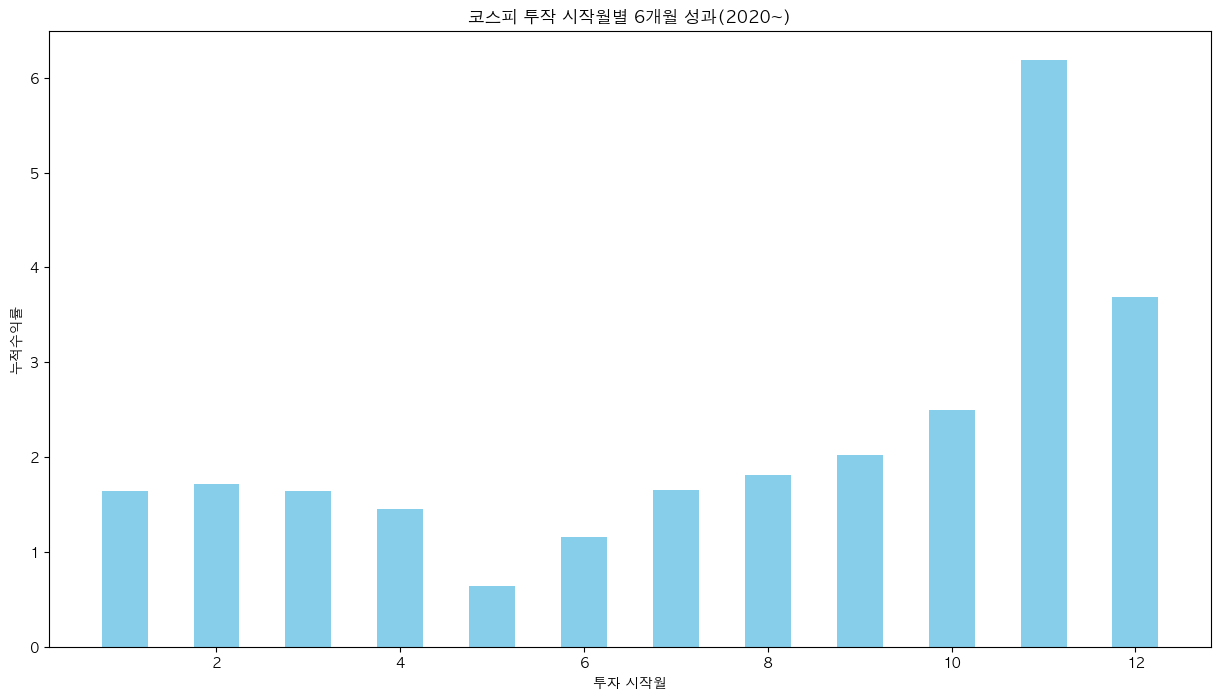

In [63]:
# 한글처리
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic') 
else:
    plt.rc('font', family='Malgun Gothic') 
    
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.bar(
    x=list(data.keys()), 
    height=list(data.values()), 
    width=0.5, 
    color='skyblue'
)

plt.title("코스피 투작 시작월별 6개월 성과(2020~)")
plt.xlabel("투자 시작월")
plt.ylabel("누적수익률")

plt.show()